# Deutsch's Algorithm 
### By Joshua Uzell
***

In the world of quantum computing, there are many different types of problems. One of these is called the parity problem (also referred to as Deutsch's Problem) **[4]** (https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms). Whilst on the lower end of difficulty for problems in quantum computing, it's still an interesting enough challenge that evolves around the output of bits, and to see whether we get a constant output or a random balanced output from a function. We can solve this issue using the power of Deutsch's Algorithm. 

We'll first give a brief overview of quantum computing so we can understand why it's relevant. Then we'll talk about the Deutsch Algorithm, going over the problem it's trying to solve, the solution it provides and then we'll implement that solution using Qiskit by creating a quantum circuit. Lastly we'll run the circuit and see the results before summurizing with our conclusion. Note that the code was created with the aid of Open A.I's ChatGPT with comments and explainations written by myself.

## Brief overview of quantum computing
***

According to IBM **[1]**, classical computation (everyday computation on computers) is becoming trickier to use for solving specific complex problems due to using old transistors. Supercomputers have been used to try and solve these issues but even then, we will still reach a limit when it comes to very complex issues due to the many different things that can interact with eachother.**[1]** (https://www.ibm.com/topics/quantum-computing)

This is why as IBM points out **[1]**, the idea behind quantum computing is to solve those incredibly complicated problems that can't be solved by classical means by using the laws of quantum mechanics with quantum computers.**[1]** We'll look at the benefits of quantum computing using an algorithmic framework known as 'The Query Model of Computation'.

### The Query Model of Computation
***

It's a simple framework that according to IBM **[4]** isn't very accurate in terms of showing off the actual types of computational problems that are usually worked on, but at the very least, it's great for showcasing the potential of quantum computers in terms of solving difficult problems that classical computers cannot. **[4]** 

Usually with a given problem, at a high level we have an input (in the format of a binary string) that is provided directly to some sort of computation that processes the input and then delivers an output at the end as shown in the figure below **[4]**

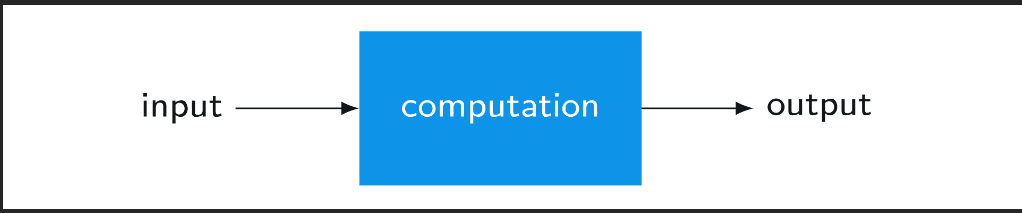

<h6>A model of a computational process found via <a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-query-model-of-computation">https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-query-model-of-computation</a> [7], n.d.</h6>

However when dealing with the query model, things work slightly differently in that the input is not delivered directly to the computation but rather the computation has to make queries (ask questions) to something called an oracle (also referred to as a black-box) which contains the input (represented as a function). The reason the computation needs to send queries to the oracle is because it's unclear as to how its contained input function works. So it must be asked questions in order for us to understand its inner workings. **[4]** You can see this process in the figure below. 

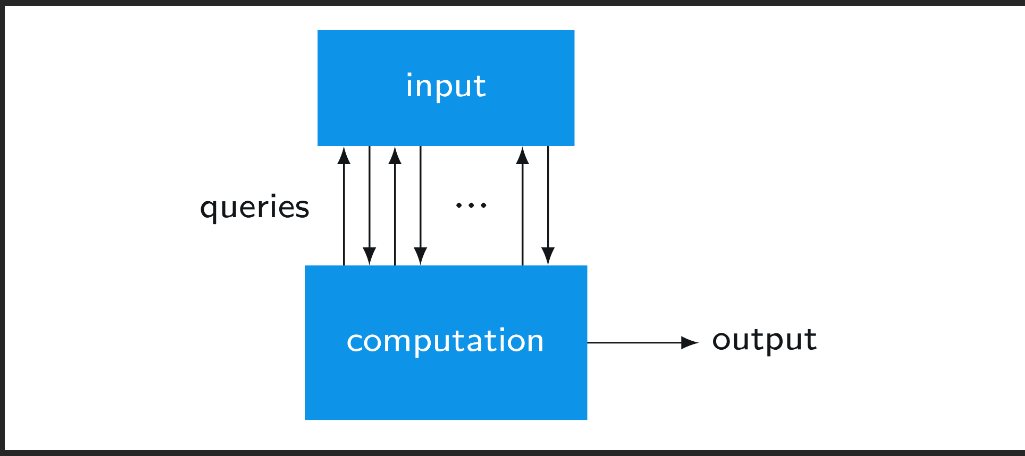

<h6>Image of the query model found via <a href="https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-query-model-of-computation">https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-query-model-of-computation</a> [8], n.d.</h6>

In IBM's quantum algorithm course **[4]**, they mention that in order to make it easier to understand, the efficiency of an algorithm (in our case Deutsch's algorithm) will be measured by the number of queries (questions) that have to be made to the oracle in order to understand how its contained input function works. **[4]**

The IBM course **[4]** presents the binary alphabet as $ \Sigma $ = {0,1} and the input function as $f: \Sigma_n \rightarrow \Sigma_m $ which is a string of bits to another string of bits. The symbol 'n' represents the length of the input bit string and 'm' displays the length of the output bit string. Both these values are positive integers.

### Defining Query Gates
***

//Explain query gates here

### Defining Qubits
***

Qubits act similarly to classical bits in that they're an important part of how information is represented in quantum computing. **[6]** (https://www.techtarget.com/whatis/definition/qubit)

 They also have certain attributes that make them unique from classical bits. The main attribute that will be important for solving the Deutsch Problem is called superposition.**[6]**

### Defining Superposition
***

Imagine you have a classical bit but it can be only be in a state of '1' or '0'. Well that's the benefit of using a qubit over a normal classical bit. It has the ability to be in multiple states at the same time until the qubit is being looked at, which causes the qubit to stay in just one state. **[5]** (https://medium.com/@cherkashin/quantum-superposition-decision-making-6a5b49d0286) 

### //NEED TO EXPLAIN INTERFERENCE ---

### //NEED TO EXPLAIN ENTANGLEMENT ---

### //NEED TO EXPLAIN PARALLELISM ---

Now that we've looked over some of the essential points of quantum computing, we'll now take a look at the problem that we want to solve in this notebook, Deutsch's problem.

## Problem Definition being faced before using Deutsch's Algorithm
***

Deutsch's Problem is about the issue of not knowing the inner workings of the input function contained within in the oracle. This is important because we want to confirm if the input function is either constant or balanced. **[2]** (https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/) 

//NEED TO EXPLAIN DIFFERENCE BETWEEN CONSTANT AND BALANCED//

This problem was first proposed in a paper by David Deutsch from 1985 in which he argues for the use of quantum mechanics within computers to solve more complex problems such as Deutsch's Problem.
Whilst the algorithm was a great stepping stone for quantum mechanics, it was only used as a proof of concept for solving the problem with a single input.

In 1992, Deutsch alongside Richard Jozsa would propose an improved version known as the Deutsch-Jozsa algorithm, which could take in multiple inputs instead of just one, showcasing the potential of quantum problem solving. However, for this notebook we will focus on how the problem was first solved with the original Deutsch's Algorithm.

## Solution using Deutsch's Algorithm
***

We will start off by putting a qubit into a state of superposition by applying some Hadamard gates. According to IBM **[4]** Since the intial state of the qubits will be ∣1⟩∣0⟩ (which means the bit is either just '1' or '0' and not both), the Hadamard gates will convert this intial default state to a superposition state which is represented by the following formula: 

$|\pi_1\rangle = |-\rangle|+\rangle = \frac{1}{2}(|0\rangle - |1\rangle)|0\rangle + \frac{1}{2}(|0\rangle - |1\rangle)|1\rangle.$

Now that our qubits are in a state of superposition, we will now apply our oracle (represented as $U_f$) to the problem.

///EXPLAIN ABOUT APPLYING ORACLE HERE//

///REST OF THE STEPS HERE///

Now that we've explained the steps to take for this algorithm, lets implement this solution using a quantum circuit created with Qiskit.

## Implementation
***

First as seen below we will import qiskit and also the random libraries. Qiskit allows us to use quantum circuits and the random library lets us create a random oracle that will be applied to the qubits within the circuit so as to demonstrate a key element of the Deutsch problem. 

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import random

After doing our imports, we will create a new quantum circuit that begins with 2 initial qubits and 1 classical bit.

In [2]:
#Create the quantum circuit. This includes 2 initial qubits and 1 classical bit
quantumCircuit = QuantumCircuit(2, 1)

Now that the circuit is created, we will now apply a Hadamard gate to each of the qubits. This will put these qubits into a state of superposition.

In [3]:
#Apply a Hadamard gate to both the first qubit and second qubit
#so as to put them in superposition
quantumCircuit.h(0) 
quantumCircuit.h(1)

Below we are applying a random function to the 2 qubits. The function will either be constant or balanced which is what we are trying to prove with Deutsch's algorithm.

In [4]:
#Apply a random oracle to the qubits
#This if check will see if the function if either constant or balanced
#if its balanced, we apply a CNOT gate
#else we do nothing
if random.choice([True, False]):
    quantumCircuit.cx(0, 1)
else:
    pass

Once the qubits have passed through the function, we will now apply a Hadamard gate to the first qubit and then we will measure that qubit.

In [5]:
#After passing through oracle, we apply a Hadamard gate to the first qubit again
quantumCircuit.h(0)

#We then measure that qubit
quantumCircuit.measure(0, 0)

We then draw out the circuit as shown below.

c:\Users\joshu\AppData\Local\Programs\Python\Python311\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


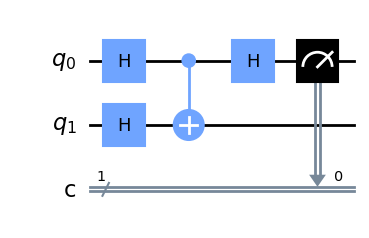

In [6]:
quantumCircuit.draw(output='mpl')

## Simulation and Results
***

Let's now run the circuit to see what kind of results that we get. We will Qiskit's Aer Module simulate the running a quantum circuit on a quantum computer. The simulator we'll be using is qasm_simulator.

In [7]:
#Retrieve Aer's qasm_simulator
qasm_simulator = Aer.get_backend('qasm_simulator')

Now using the simulator, we will run the quantum circuit. The circuit will run 100 times so we can make sure that the results for each run are consistent.

In [8]:
#Run the quantum circuit
execution = execute(quantumCircuit, qasm_simulator, shots=100)

After running the circuit, a final result will be retrieved.

In [9]:
#Retrieve the final result from the circuit
finalResult = execution.result()

We will then print out the counts from the final result which will be displayed in a dictionary format. The key gives us a possible outcome for the measurement of the first qubit and the value shows the number of the times that the circuit ran. By observing what outcome comes out consistently, we can then determine if the encapsulated function is either constant or balanaced. From the results of our circuit, get consistently get a value of '0'. This means that the measured qubit is always collapsing to a state of |0⟩. Therefore the we can confirm that the function is constant.

In [10]:
#Retrieve the counts from the result
counts = finalResult.get_counts(quantumCircuit)
print(counts)

{'0': 100}


## Conclusion
***

We have seen from running our quantum circuit the potential of quantum computation for solving difficult computational problems in an efficient manner. 

We looked over the concepts of quantum mechanics such as superposition, entanglement and interference and how these can be applied to qubits in order to solve complex problems. We discussed the Deutsch Algorithm, demonstrating its ability to solve the Deutsch Problem by using the Qiskit library to run a simulated quantum circuit and see if the encoded input function was either constant or balanced. 

Whilst quantum computation won't fully take over classical computation as of yet, its still a great tool to use alongside it and lays the ground work for future computational problem solving.

## References
***

[1] IBM, (no date). What is Quantum Computing? Available at https://www.ibm.com/topics/quantum-computing. Accessed on 9th November 2023.

[2] Onofre, V., 2021. The Deutsch Algorithm, Full-Stack Quantum Computation. Available at: https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/ Accessed on 10th December 2023.

[3] NEED TO INSERT A NEW REFERENCE HERE

[4] John, W., (no date) Fundamentals of quantum algorithms, IBM Quantum Learning. Available at: https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms Accessed on 1st December 2023.

[5] Cherkashin, P., 2023. Quantum Superposition & Decision-Making, Medium. Available at: https://medium.com/@cherkashin/quantum-superposition-decision-making-6a5b49d0286 Accessed on 7th December 2023.

[6] Robert, S., 2023. qubit (short for quantum bit), TechTarget. Available at: https://www.techtarget.com/whatis/definition/qubit Accessed on 7th December 2023.

[7] Unknown., (no date) A model of a computational process. Available at: https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-query-model-of-computation Accessed on 14th December 2023.

[8] Unknown., (no date) Image of the query model. Available at: https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms#the-query-model-of-computation Accessed on 14th December 2023.

***
## End of Notebook